## Lab task - 01

In [ ]:

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
df = pd.read_csv("/content/promotion_dataset.csv")
df

,Employee_ID,Department,Education,Gender,Experience_Years,Performance_Score,Promoted
0,101,IT,Diploma,Female,12,74,No
1,102,Marketing,Diploma,Female,13,84,No
2,103,Finance,Bachelor,Male,14,66,No
3,104,HR,Bachelor,Female,8,78,Yes
4,105,Sales,Master,Male,13,81,No
5,106,HR,Master,Male,17,57,Yes
6,107,Sales,PhD,Male,6,86,No
7,108,Marketing,PhD,Female,17,51,No
8,109,Operations,Diploma,Male,20,71,Yes
9,110,Sales,Diploma,Male,8,86,Yes


In [ ]:
# create dummies.
df_encoded = pd.get_dummies(df, columns=['Department', 'Education'], drop_first=1)
df_encoded

,Employee_ID,Gender,Experience_Years,Performance_Score,Promoted,Department_HR,Department_IT,Department_Marketing,Department_Operations,Department_Sales,Education_Diploma,Education_Master,Education_PhD
0,101,Female,12,74,No,False,True,False,False,False,True,False,False
1,102,Female,13,84,No,False,False,True,False,False,True,False,False
2,103,Male,14,66,No,False,False,False,False,False,False,False,False
3,104,Female,8,78,Yes,True,False,False,False,False,False,False,False
4,105,Male,13,81,No,False,False,False,False,True,False,True,False
5,106,Male,17,57,Yes,True,False,False,False,False,False,True,False
6,107,Male,6,86,No,False,False,False,False,True,False,False,True
7,108,Female,17,51,No,False,False,True,False,False,False,False,True
8,109,Male,20,71,Yes,False,False,False,True,False,True,False,False
9,110,Male,8,86,Yes,False,False,False,False,True,True,False,False


In [ ]:
# use lebel encoding.
label_encoder = LabelEncoder()
df_encoded['Gender'] = label_encoder.fit_transform(df_encoded['Gender'])
df_encoded.head()

,Employee_ID,Gender,Experience_Years,Performance_Score,Promoted,Department_HR,Department_IT,Department_Marketing,Department_Operations,Department_Sales,Education_Diploma,Education_Master,Education_PhD
0,101,0,12,74,No,False,True,False,False,False,True,False,False
1,102,0,13,84,No,False,False,True,False,False,True,False,False
2,103,1,14,66,No,False,False,False,False,False,False,False,False
3,104,0,8,78,Yes,True,False,False,False,False,False,False,False
4,105,1,13,81,No,False,False,False,False,True,False,True,False


In [ ]:
# create the instance.
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')


In [ ]:
# train.
encoded_data = one_hot_encoder.fit_transform(df[['Education', 'Department']])

In [ ]:
#encode -> panda convert.
encoded_df = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out(['Education', 'Department']))

In [ ]:
# original er sathe compere kora.
df = pd.concat([df, encoded_df], axis=1).drop(['Education', 'Department'], axis=1)

In [ ]:
# print the df
df.head()

,Employee_ID,Gender,Experience_Years,Performance_Score,Promoted,Education_Diploma,Education_Master,Education_PhD,Department_HR,Department_IT,Department_Marketing,Department_Operations,Department_Sales
0,101,Female,12,74,No,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,102,Female,13,84,No,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,103,Male,14,66,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,104,Female,8,78,Yes,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,105,Male,13,81,No,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# make copy of the df
data = df.copy()

In [ ]:

X = data.drop('Promoted', axis=1)
y = data['Promoted']

In [ ]:
y = df['Promoted']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
categorical_features = ['Gender']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

In [ ]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_encoded, y_train)


DecisionTreeClassifier(random_state=42)

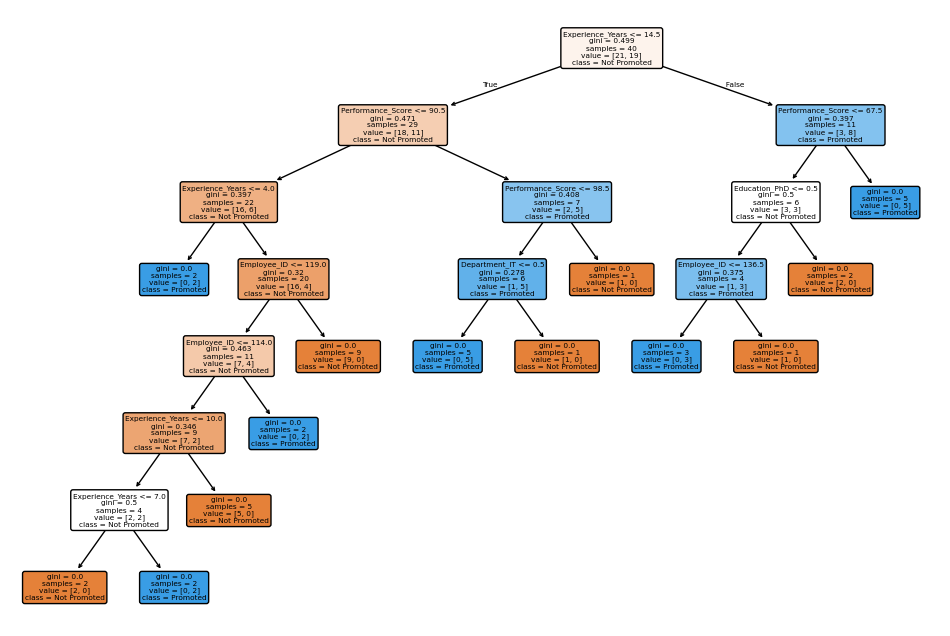

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=X_train_encoded.columns, class_names=['Not Promoted', 'Promoted'], filled=True, rounded=True)
plt.show()

In [ ]:
# make prediction on test set.
y_pred = tree_model.predict(X_test_encoded)

In [ ]:
# now generate matrix.
cm = confusion_matrix(y_test, y_pred)

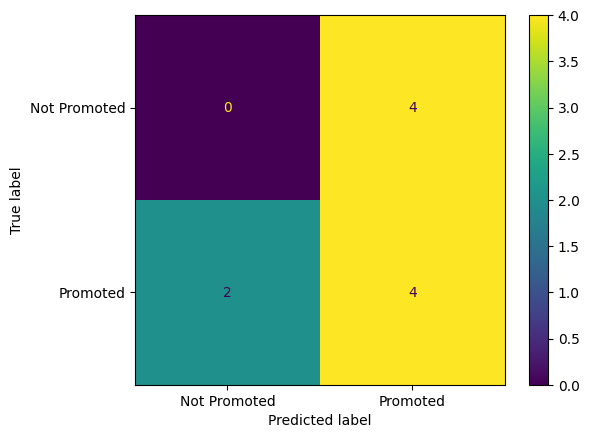

In [ ]:
# display it.
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Promoted', 'Promoted'])
disp.plot()
plt.show()